In [1]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [25]:
# close opened serial
if (ser):
    ser.close()

In [10]:
record_time = 5
serial_port = 'COM5'

end_time = time.time() + record_time

serial_out = []
ser = serial.Serial(serial_port, 230400)
print(ser.name)

while time.time() < end_time:
    x = ser.read(16)
#     x = ser.read_until()
    serial_out.append(x)

    
    
print(len(serial_out))
# print(serial_out)
ser.close()

COM5
4997


In [11]:
samples = np.array([])
for sample in serial_out:
    for channel in range(0,16,2):
         samples = np.append(samples, int.from_bytes(sample[channel:channel+2], byteorder='big', signed=False))

samples = np.reshape(samples, (len(serial_out), 8))


In [12]:
record = open("signal_record.txt", "w")
g = (value for value in samples)

for x in g:
    for y in x:
        record.write(str(int(y)) + ",")
    record.write("\n")
# record.write(((int)value, for value in samples))

In [ ]:
plt.figure(figsize=(20, 20))
plt.xlabel('time(ms)')
plt.ylabel('level(max 5V)')
plt.title('channel3')
plt.plot(samples[:])
plt.axis([0, 5000, 0, 4500])
plt.show()
Axes3D.plot_wireframe(samples)

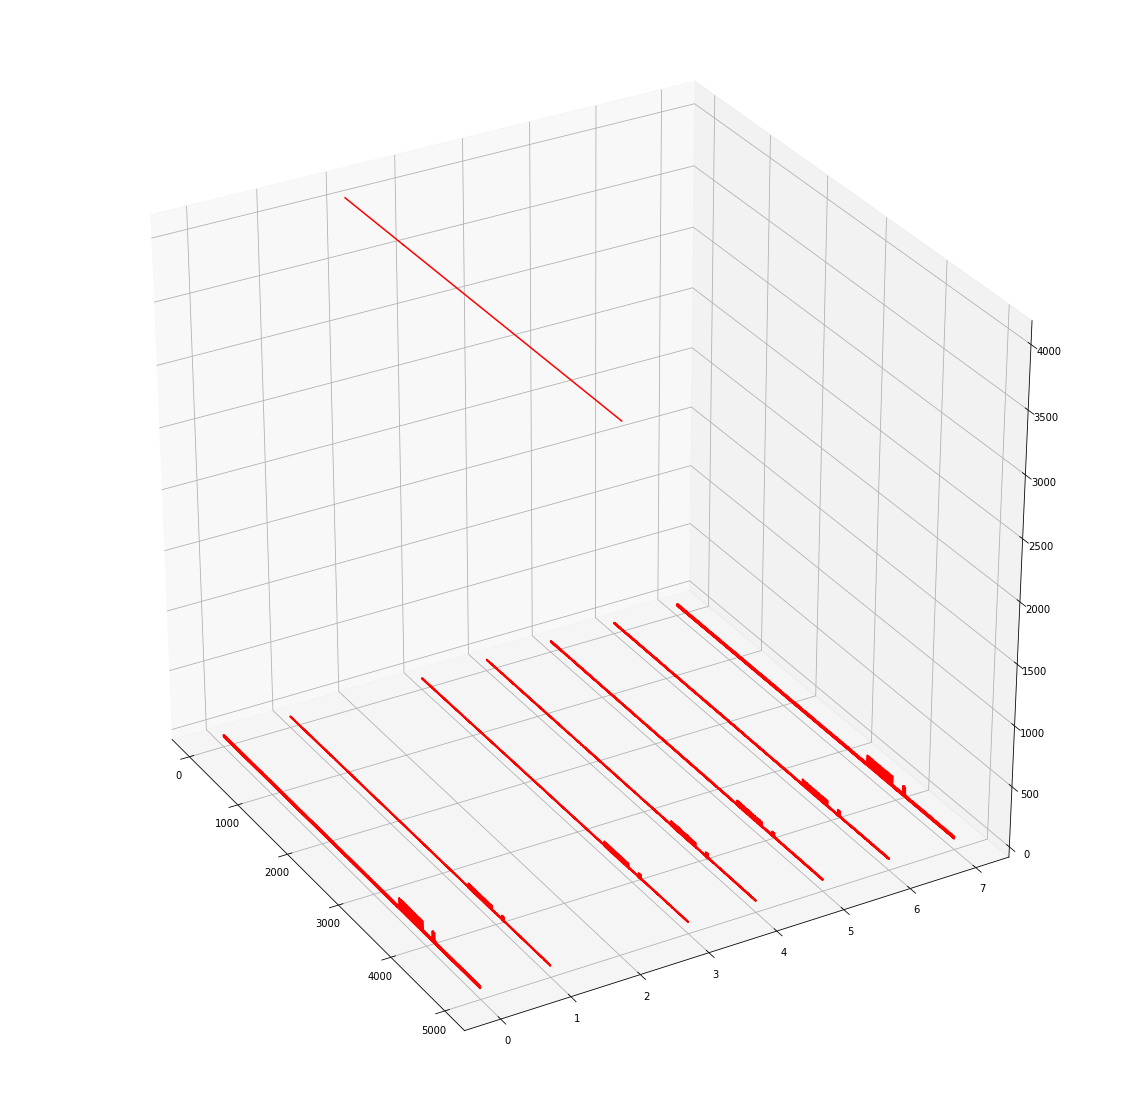

In [13]:

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(20,20))

datasets = [{"x":np.arange(0, len(samples[:,i]), 1) , "z":samples[:,i], "y":[i for _ in range(len(samples[:,i]))], "colour": "red"} for i in range(8)]

ax.view_init(30, -30)

for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])

plt.show()